In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
import itertools

#### Figure aesthetics

In [2]:
#print(plt.style.available)
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

#### Downlad data

In [3]:
def get_data():
    ##Get data from the source that is used to generate map (based on WHO official data):
    ##https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR0oKIKJlc-zeNZGFBVEN0-O-58daoCDaKicXwC10cjFWgCZqTPgavseTfI#/bda7594740fd40299423467b48e9ecf6
    url = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
    r = requests.get(url)

    filename="data.csv"
    f = open(filename,'wb')
    f.write(r.content)

In [4]:
get_data()

#### Prepare dataset

In [5]:
## prepare dataset
data = pd.read_csv("data.csv")
data=data.drop(columns=["Province/State", "Lat", "Long"])
## aggregate data for each country
data=data.groupby("Country/Region").sum().reset_index()
## reshape data
data.reset_index(drop=True, inplace=True)
data=data.set_index("Country/Region")
data=data.transpose().reset_index().rename(columns={'index':'Date'})
data['Date'] = pd.to_datetime(data['Date'])

#### List of countries in dataset

In [6]:
for el in data.columns:
    print(el)

Date
Afghanistan
Albania
Algeria
Andorra
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Chile
China
Colombia
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
Estonia
Finland
France
French Guiana
Georgia
Germany
Greece
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Korea, South
Kuwait
Latvia
Lebanon
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mexico
Moldova
Monaco
Mongolia
Morocco
Nepal
Netherlands
New Zealand
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Reunion
Romania
Russia
San Marino
Saudi Arabia
Senegal
Serbia
Singapore
Slovakia
Slovenia
South Africa
Spain
Sri Lanka
Sweden
Switzerland
Taiwan*
Thailand
Togo
Tunisia
Turkey
US
Ukraine
Unite

#### Choose countries to plot (separate by "," no spaces)

In [7]:
countries_to_plot="China,Germany,France,Poland,Italy".split(",")

#### Make plot

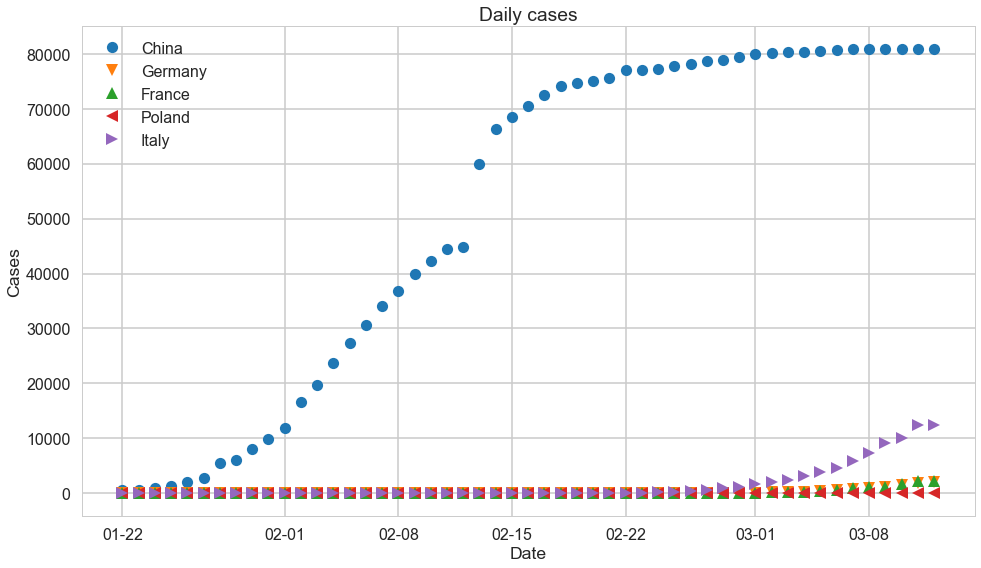

In [9]:
##extract data for each country
dates=data["Date"].values
countries=[]
for country in countries_to_plot:
    countries.append(data[country].values)

## Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 9))
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'S', 'p', 'P')) 
## Add x-axis and y-axis
for country, country_name in zip(countries, countries_to_plot):
    ax.plot(dates, country, marker=next(marker), linestyle='', label=country_name)
## Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Daily cases")
## Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

## axes limits
#ax.set_xlim([datetime.date(2020, 2, 10), datetime.date.today() + datetime.timedelta(days=3)])# datetime.date(2020, 3, 15)])
#ax.set_ylim([0,100])
ax.legend()
plt.show()